In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [6]:
import pandas as pd
data=pd.read_csv("D:\\EXCLER solution\\data set\\Multi Linear Regression\\ToyotaCorolla.csv",encoding='latin1')
print(data.head())

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1     

In [7]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [9]:
data1=data.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [10]:
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
#check for missing values
data1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# Scatterplot between variables along with histograms

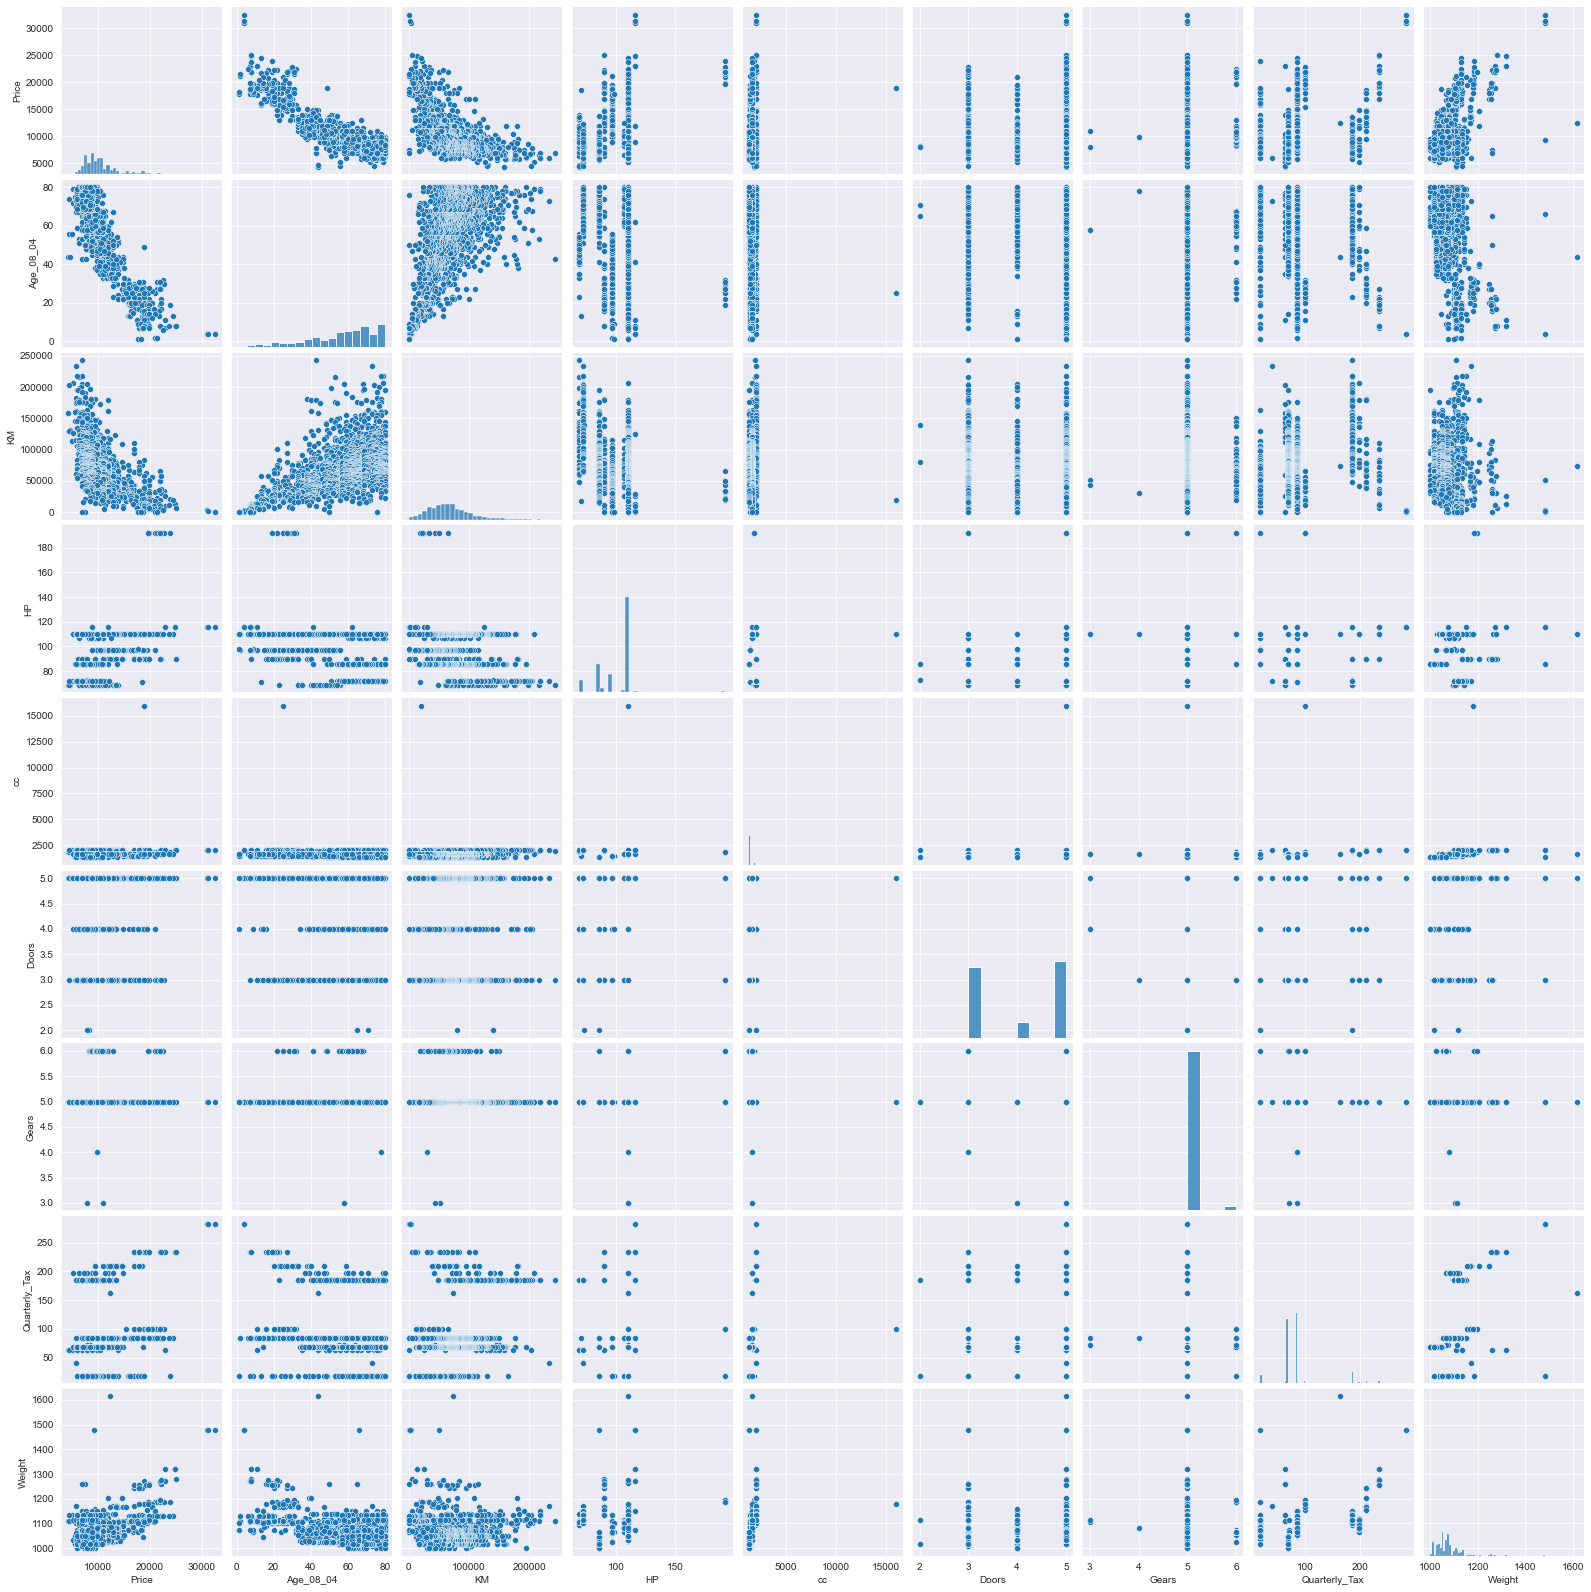

In [12]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Model Building

In [13]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+ Doors+Quarterly_Tax+Weight',data=data1).fit()

In [14]:
model

# Model validation

In [15]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Gears             594.319936
Doors              -1.616641
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [16]:
print(model.tvalues,'\n',model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Gears             3.016007
Doors            -0.040410
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Gears             2.606549e-03
Doors             9.677716e-01
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [17]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [18]:
slr_cc=smf.ols('Price~cc',data=data1).fit()

In [19]:
slr_cc.params

Intercept    9027.554784
cc              1.080168
dtype: float64

In [20]:
(slr_cc.pvalues, '\n',slr_cc.tvalues)

(Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64,
 '\n',
 Intercept    24.694090
 cc            4.824822
 dtype: float64)

In [21]:
(slr_cc.pvalues, '\n',slr_cc.tvalues)

(Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64,
 '\n',
 Intercept    24.694090
 cc            4.824822
 dtype: float64)

In [23]:
slr_d=smf.ols('Price~Doors',data=data1).fit()

In [24]:
slr_d.params

Intercept    7885.005835
Doors         705.558636
dtype: float64

In [25]:
print(slr_d.pvalues,'\n',slr_d.tvalues)

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64 
 Intercept    19.258097
Doors         7.141657
dtype: float64


In [26]:
(slr_d.rsquared,slr_d.rsquared_adj)

(0.03434555943109785, 0.03367216023962727)

In [27]:
slr_cc.params

Intercept    9027.554784
cc              1.080168
dtype: float64

In [28]:
(slr_cc.pvalues,slr_cc.tvalues)

(Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64,
 Intercept    24.694090
 cc            4.824822
 dtype: float64)

In [29]:
mlr_cc=smf.ols('Price~cc+Doors',data=data1).fit()
mlr_cc.tvalues , mlr_cc.pvalues

(Intercept    12.620704
 cc            4.340400
 Doors         6.816153
 dtype: float64,
 Intercept    1.056885e-34
 cc           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

# Model Validation

# calculating VIF

In [30]:
rsq_age=smf.ols('Age_08_04~KM+HP+cc+Gears+Doors+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_age=1/(1-rsq_age)

In [31]:
vif_age

1.8846198056602876

In [32]:
rsq_KM=smf.ols('KM~Age_08_04+HP+cc+Gears+Doors+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_KM=1/(1-rsq_KM)

In [33]:
vif_KM

1.7569047782042881

In [34]:
HP=smf.ols('HP~KM+Age_08_04+cc+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_HP=1/(1-HP)

In [35]:
vif_HP

1.4194221086310974

In [36]:
cc=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_cc=1/(1-cc)

In [37]:
vif_cc

1.1638939849423797

In [39]:
doors=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_doors=1/(1-doors)

In [40]:
vif_doors

1.156575207076043

In [41]:
Quarterly_Tax=smf.ols('Quarterly_Tax~Age_08_04+Gears+cc+KM+HP+Doors+Weight',data=data1).fit().rsquared
vif_Quarterly_Tax=1/(1-Quarterly_Tax)

In [42]:
vif_Quarterly_Tax

2.311430811531038

In [44]:
Weight=smf.ols('Weight~Age_08_04+Quarterly_Tax+cc+Gears+KM+HP+Doors',data=data1).fit().rsquared
vif_Weight=1/(1-Weight)

In [45]:
vif_Weight

2.516419837445868

In [46]:
Gears=smf.ols('Gears~Age_08_04+Quarterly_Tax+cc+KM+HP+Doors+Weight',data=data1).fit().rsquared
vif_Gears=1/(1-Gears)

In [47]:
vif_Gears

1.098723019347036

In [48]:
dataframe={'variables':['Age_08_04','KM','HP','Gears','Doors','Quarterly_Tax','cc','Weight'],'vif':[vif_age,vif_KM,vif_HP,vif_cc,vif_doors,vif_Quarterly_Tax,vif_Weight,vif_Gears]}

In [49]:
dataframe

{'variables': ['Age_08_04',
  'KM',
  'HP',
  'Gears',
  'Doors',
  'Quarterly_Tax',
  'cc',
  'Weight'],
 'vif': [1.8846198056602876,
  1.7569047782042881,
  1.4194221086310974,
  1.1638939849423797,
  1.156575207076043,
  2.311430811531038,
  2.516419837445868,
  1.098723019347036]}

In [50]:
vif_df=pd.DataFrame(dataframe)

In [51]:
vif_df

,variables,vif
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,Gears,1.163894
4,Doors,1.156575
5,Quarterly_Tax,2.311431
6,cc,2.516420
7,Weight,1.098723


In [52]:
# None variable has VIF>20,No collinearity,so consider all variable is Regression equation

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


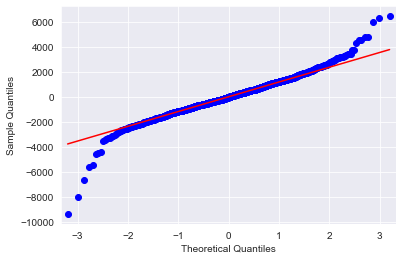

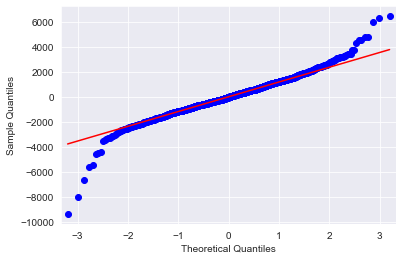

In [54]:
sm.qqplot(model.resid,line='q')

In [55]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [56]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [57]:
def standardized(values):
         return (values-values.mean())/values.std()

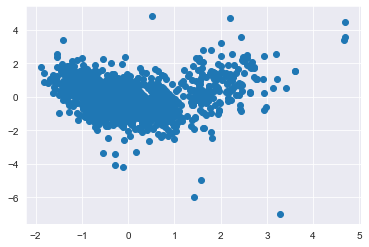

In [58]:
plt.scatter(standardized(model.fittedvalues),standardized(model.resid))

In [59]:
#residual Vs regressor

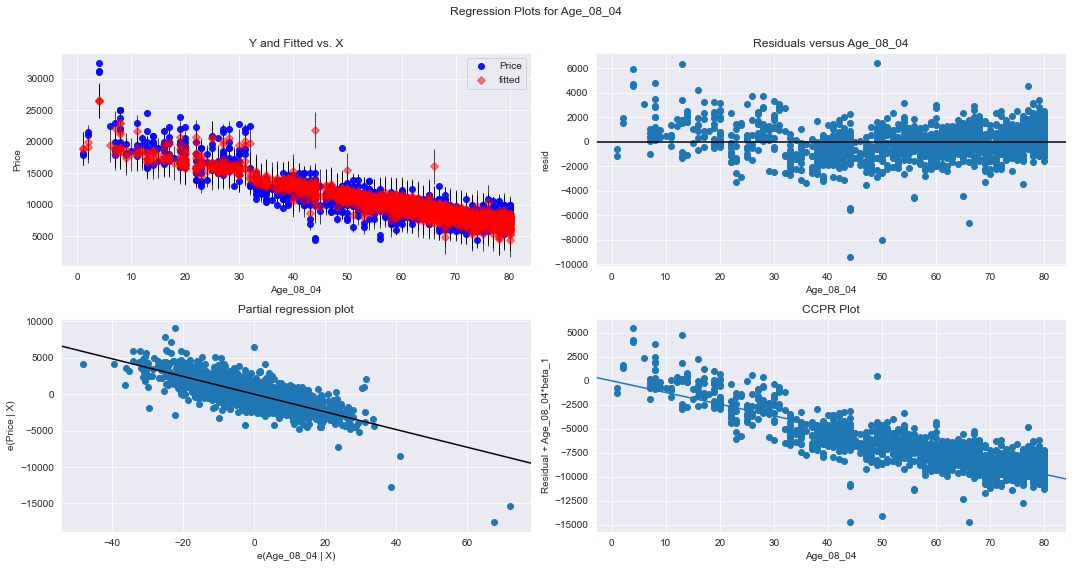

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Age_08_04",fig=fig)
plt.show()

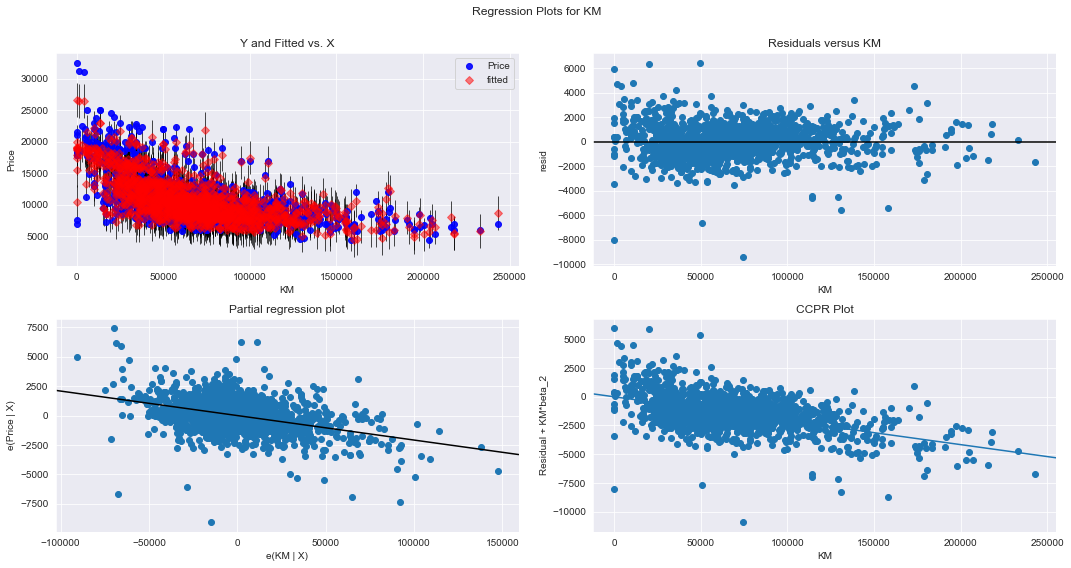

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

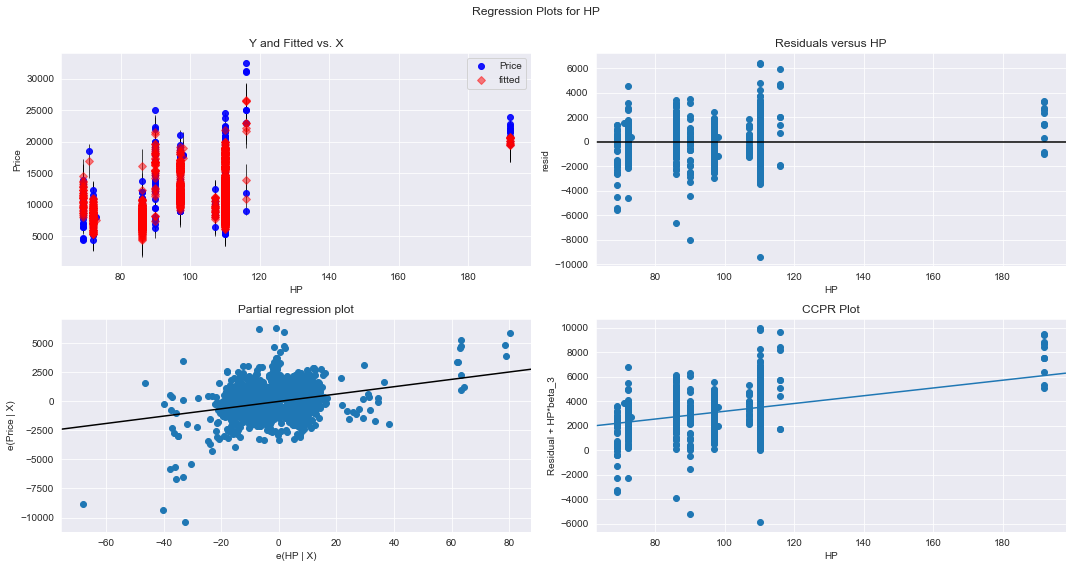

In [62]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

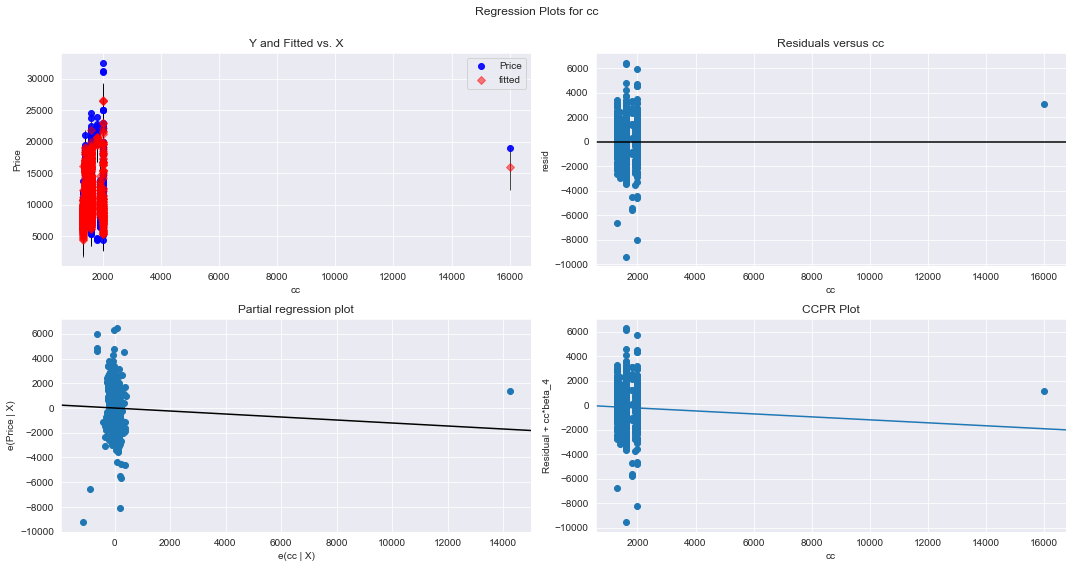

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

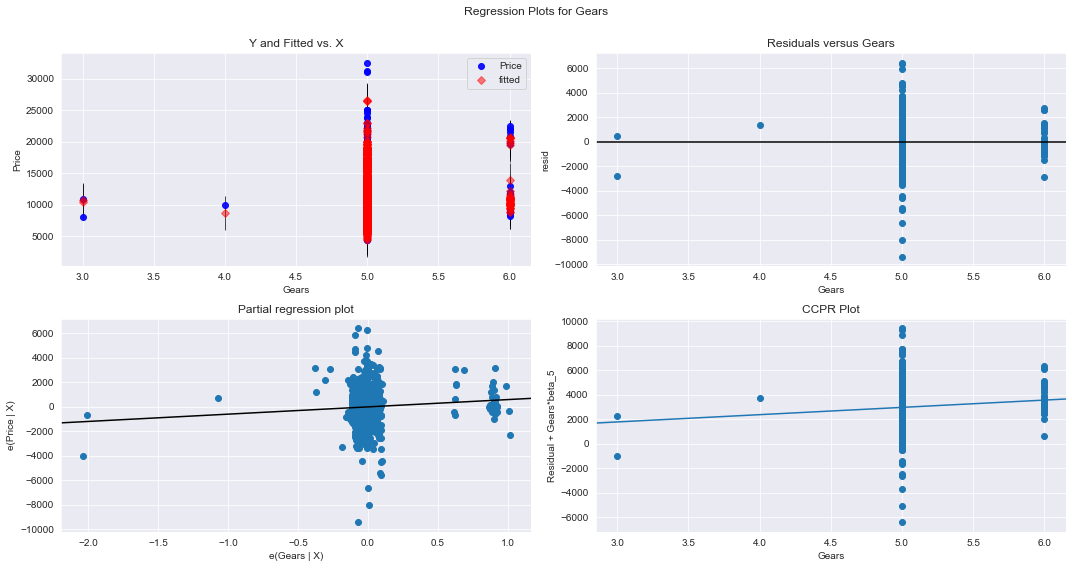

In [64]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

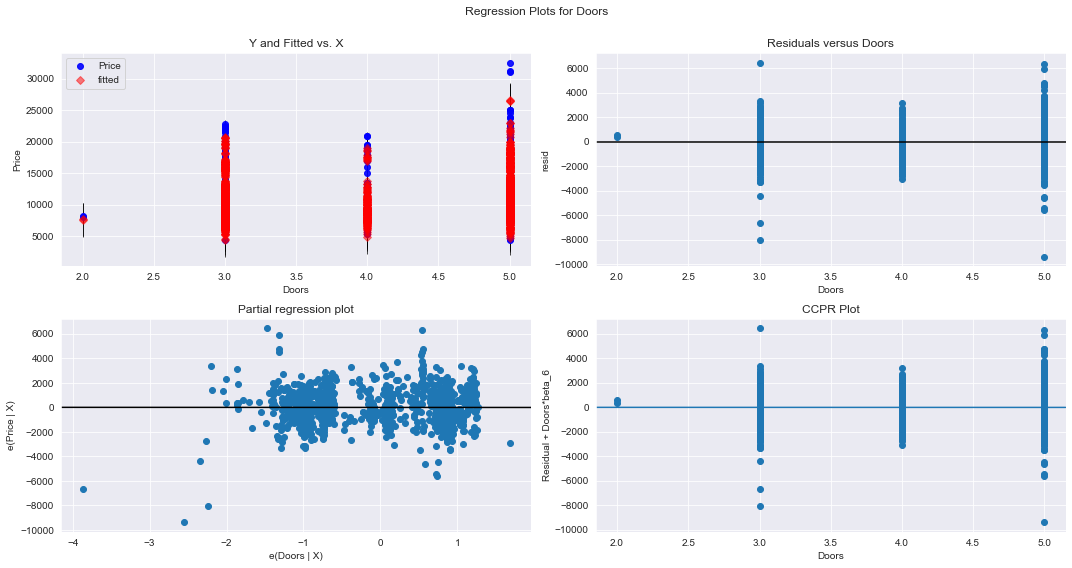

In [65]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

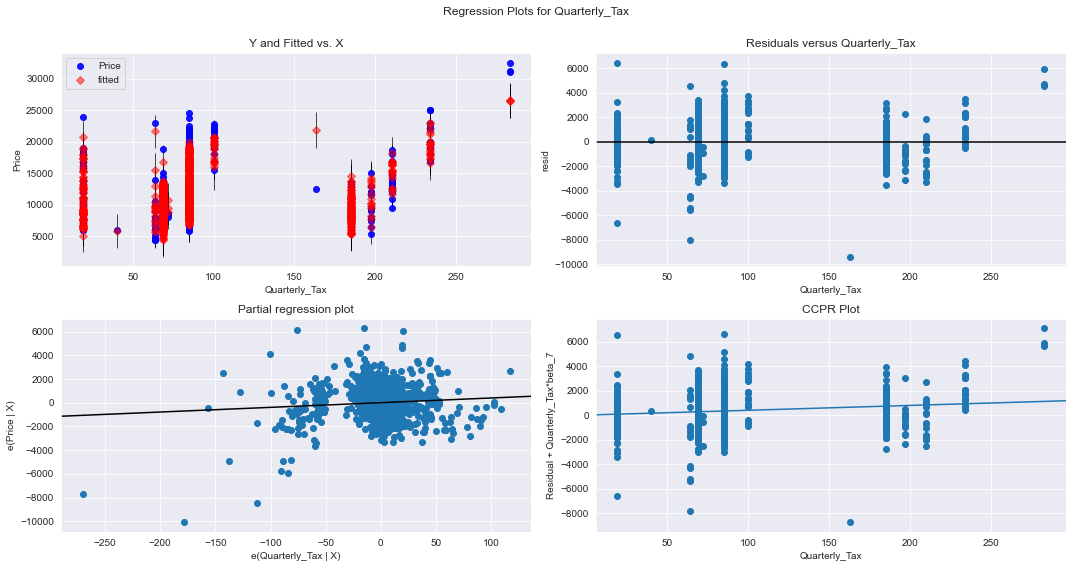

In [66]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)
plt.show()

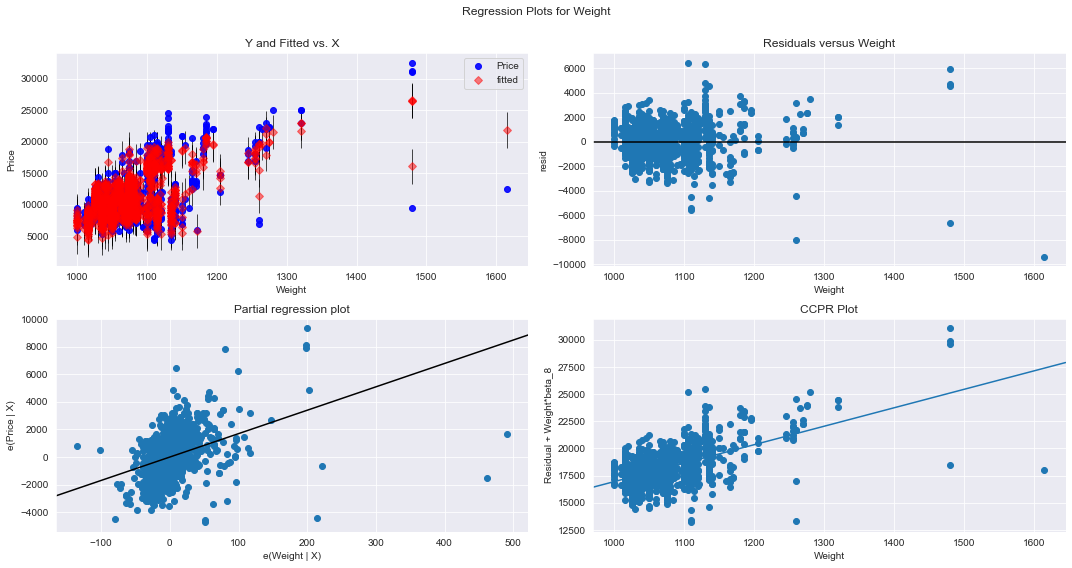

In [67]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

# cooks distance

In [68]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

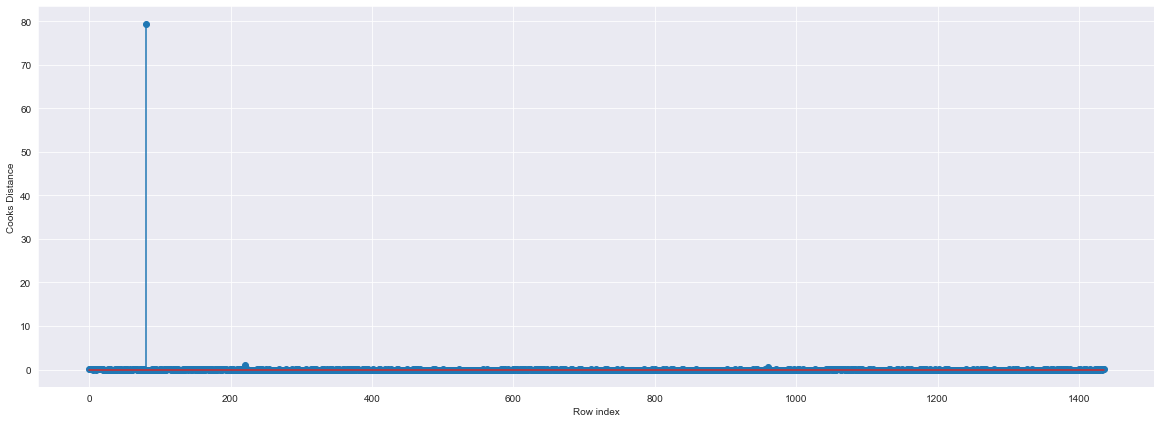

In [70]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
(np.argmax(c),np.max(c))

(80, 79.52010624137802)

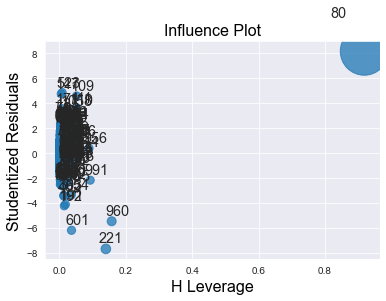

In [72]:
#high influence point
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [73]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [74]:
data1[data1.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [75]:
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# improving the model

In [79]:
data2=pd.read_csv("D:\\EXCLER solution\\data set\\Multi Linear Regression\\ToyotaCorolla.csv",encoding='latin1')

In [80]:
data2

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [82]:
#deleting influencer rows
data3=data2.drop(data2.index[[80]],axis=0).reset_index()

In [83]:
data3

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,...,1,0,1,0,0,0,1,0,0,0
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,...,1,1,1,0,1,1,1,0,0,0
1431,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,...,0,0,1,0,0,1,1,0,0,0
1432,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,...,0,0,1,0,0,0,1,0,0,0
1433,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,...,0,0,0,0,0,0,1,0,0,0


In [84]:
data3=data3.drop(['index'],axis=1)

In [85]:
data3

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [98]:
final_mlr =smf.ols('Price~Age_08_04+KM+HP+cc+Gears+ Doors+Quarterly_Tax+Weight',data=data3).fit()

In [99]:
(final_mlr.rsquared,final_mlr.aic)

(0.8693790488655817, 24687.28102432684)

# Model Predication

In [100]:
new_data1=pd.DataFrame({"Age_08_04":30,"KM":20000,"HP":92,"cc":300,"Doors":4,"Gears":4,"Quarterly_Tax":200,"Weight":1000},index=[0])
new_data1

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,30,20000,92,300,4,4,200,1000


In [101]:
final_mlr.predict(new_data1)

0    16568.348775
dtype: float64

In [102]:
pred_y=final_mlr.predict(data1)
pred_y

0       16528.990607
1       16065.803813
2       16502.686471
3       16149.527067
4       15938.095051
            ...     
1431     8971.183912
1432     8435.722285
1433     8591.588786
1434     8713.828687
1435     9969.788925
Length: 1436, dtype: float64